In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the Wisconsin Breast Cancer dataset
file_path = r"C:\Users\Shaurya\Downloads\data.csv"
df = pd.read_csv(file_path)

In [3]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

In [4]:
# Encode the 'diagnosis' column (M=1, B=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [5]:
# Handle missing values by dropping rows with null values
df = df.dropna()

In [6]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
# Build the Neural Network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train_pca.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 0.8527 - accuracy: 0.2637 - val_loss: 0.7878 - val_accuracy: 0.3407
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7880 - accuracy: 0.3352 - val_loss: 0.7408 - val_accuracy: 0.3956
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7403 - accuracy: 0.4396 - val_loss: 0.7042 - val_accuracy: 0.4505
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7016 - accuracy: 0.5192 - val_loss: 0.6744 - val_accuracy: 0.5495
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6696 - accuracy: 0.5687 - val_loss: 0.6492 - val_accuracy: 0.6154
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6410 - accuracy: 0.6264 - val_loss: 0.6250 - val_accuracy: 0.6374
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6142 - accuracy: 0.7390 - val_loss: 0.6016 - val_accuracy: 0.6813
Epoch 8/50
12/12 [=

In [13]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_pca)
y_pred = (y_pred_prob > 0.5).astype(int)

4/4 [==============================] - 0s 2ms/step


In [14]:
# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



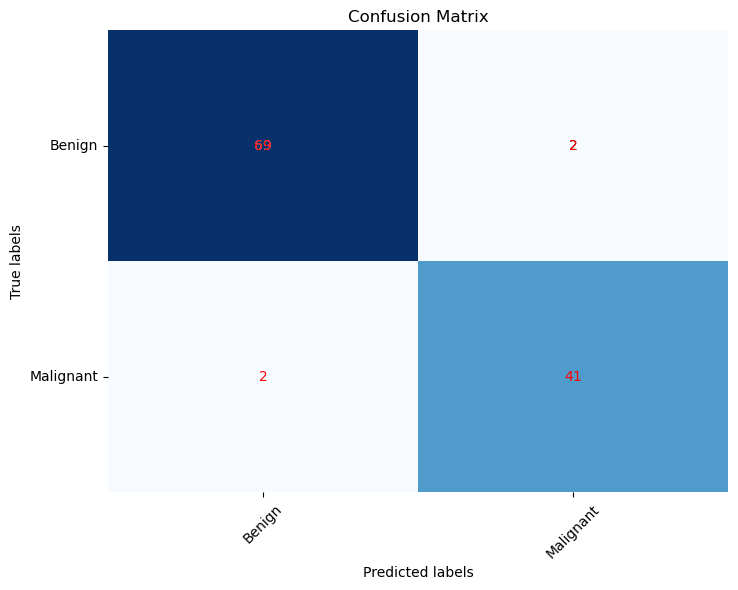

In [17]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add counts
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i][j]), ha='center', va='center', color='red')

plt.show()

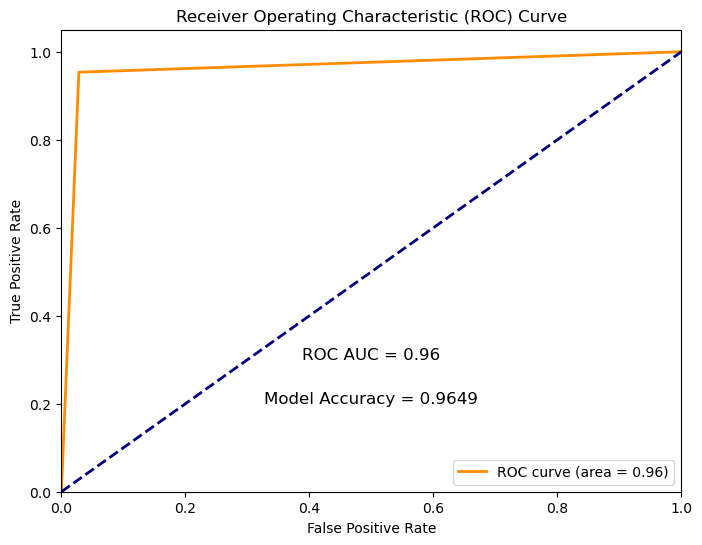

In [18]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Add ROC-AUC score to the plot
plt.text(0.5, 0.3, 'ROC AUC = %0.2f' % roc_auc, ha='center', fontsize=12)
plt.text(0.5, 0.2, 'Model Accuracy = %0.4f' % accuracy, ha='center', fontsize=12)

plt.show()


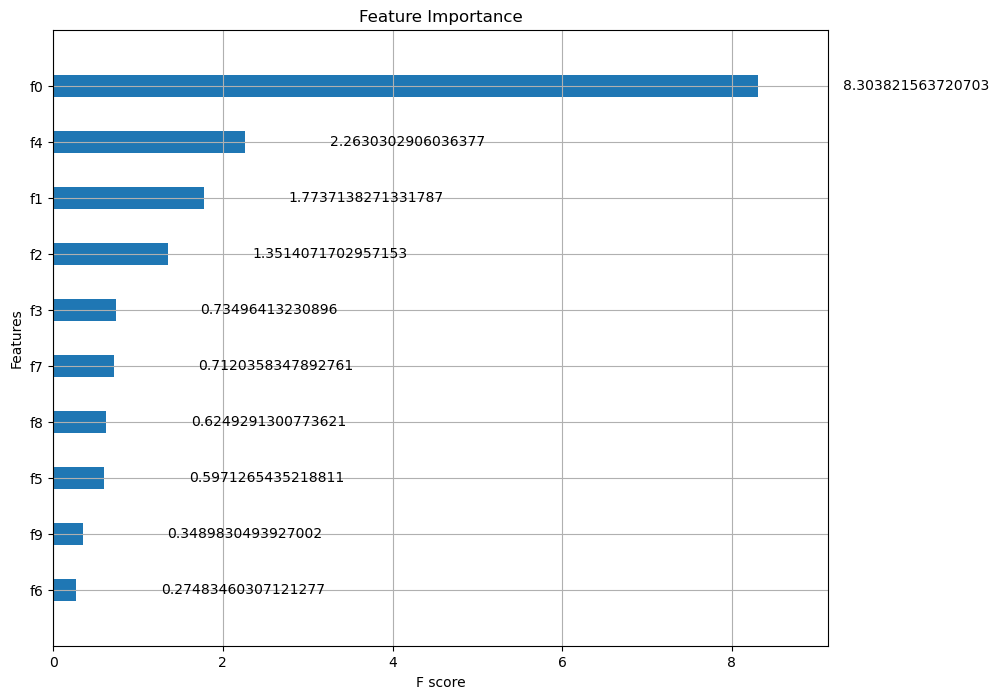

In [19]:
# Feature Importance
from xgboost import XGBClassifier, plot_importance

# Re-train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_pca, y_train)

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, ax=plt.gca(), importance_type='gain', max_num_features=10, height=0.4)
plt.title('Feature Importance')
plt.show()


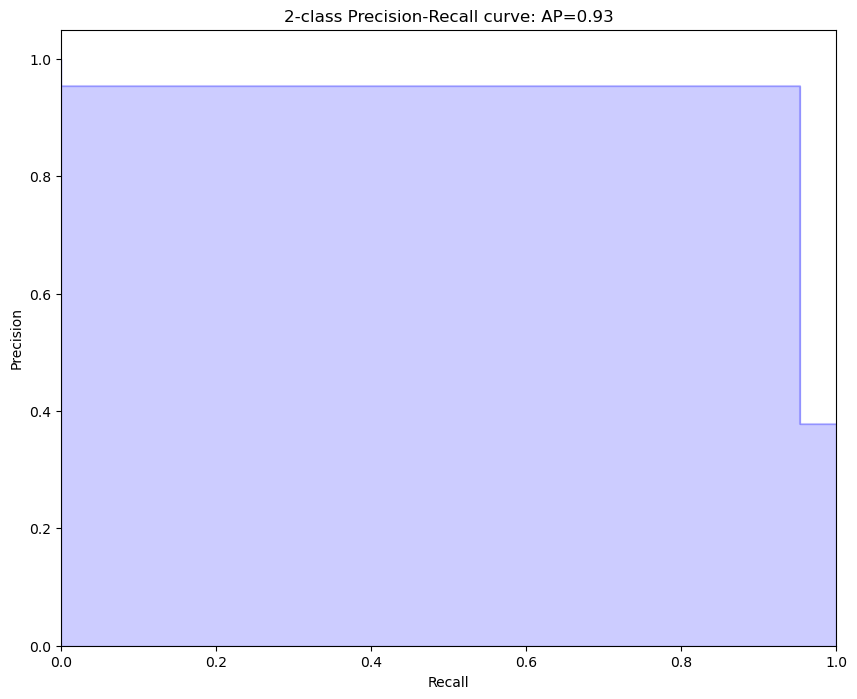

In [20]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

C:\Users\Shaurya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shaurya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shaurya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shaurya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

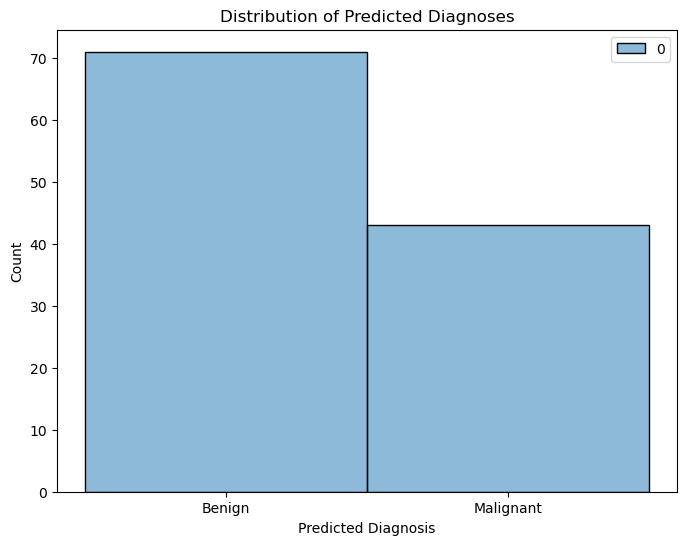

In [21]:
# Distribution of Predictions
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=False, bins=2)
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Predicted Diagnoses')
plt.xticks(ticks=[0.25, 0.75], labels=['Benign', 'Malignant'])
plt.show()

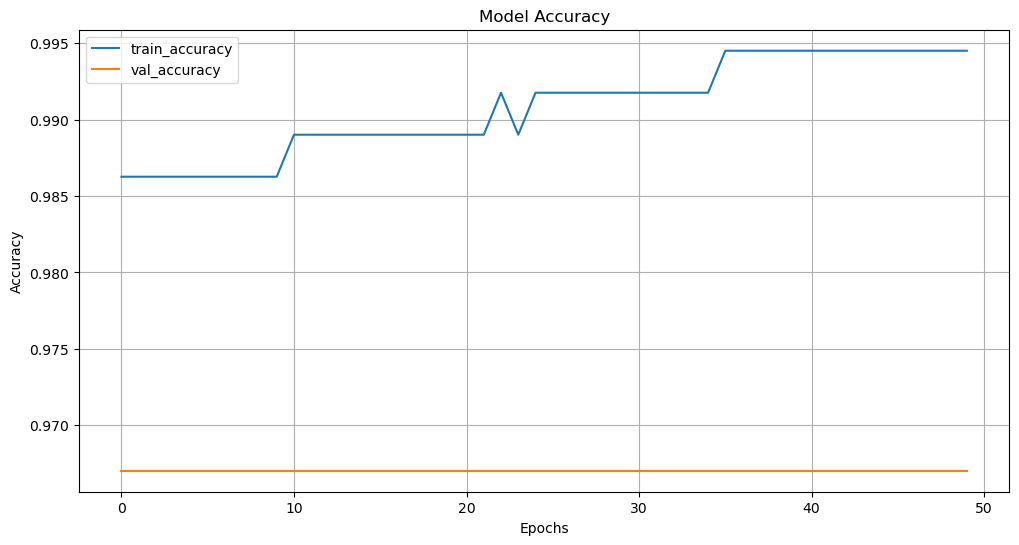

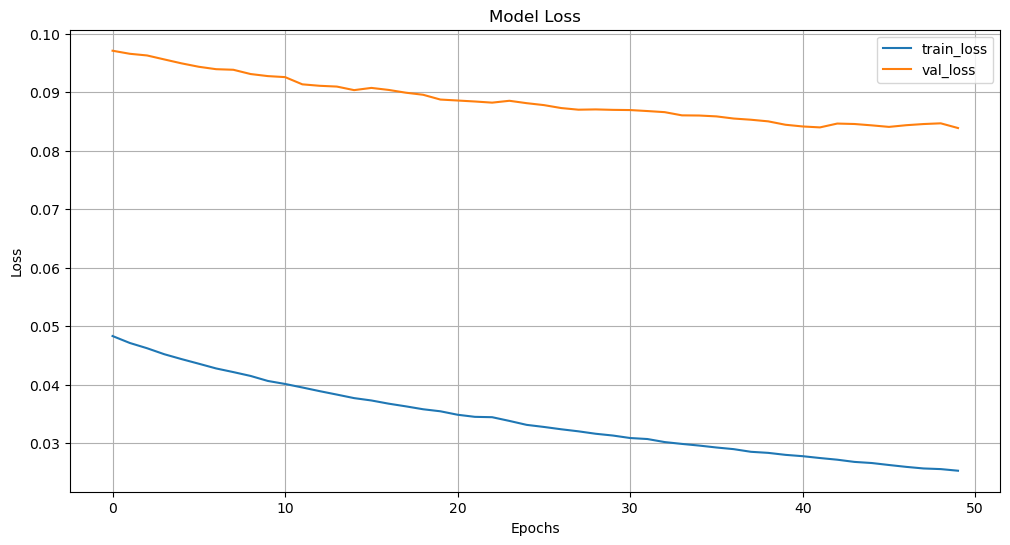

In [25]:
# Train the model
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Plot learning curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curves(history)